# Exploratory Data of K-Pop Idols

![kpop](What-is-K-Pop-min.png)
![](https://www.90daykorean.com/what-is-kpop/)

K-pop (abbreviation of Korean pop) is a genre of popular music originating in South Korea. K-pop is a term that is often used on the internet, and there is quite a popular fan following around the world. This ‘once local, now global’ phenomenon has an interesting background.

K-pop idols are groups and artists formed by the various entertainment companies creating catchy Korean popular music and targeting younger audiences. The music groups are formed from a group of people who are all particularly talented in at least one of the following: singing, rapping, and dancing. These idols often enter the entertainment company in their teens and then train hard for years in areas like singing, rapping, dancing, and foreign languages. Then, if they are lucky and talented enough, by the end of their teens they will be picked for an idol group.

K-pop idols have data! And it will be interesting if we explore this to answer several general questions. I will create some features based on the existing features.The dataset is about K-pop idols profile from 1992 to 2020.

Data source : [K-Pop Database](https://dbkpop.com/)

In [1]:
# Importing needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Improting dataset
idols = pd.read_csv('kpop_idols.csv')
display(idols)

,Stage Name,Full Name,Korean Name,K. Stage Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender
0,A.M,Seong Hyunwoo,성현우,에이엠,1996-12-31,Limitless,South Korea,NaN,NaN,M
1,Ace,Jang Wooyoung,장우영,에이스,1992-08-28,VAV,South Korea,NaN,NaN,M
2,Aeji,Kwon Aeji,권애지,애지,1999-10-25,Hashtag,South Korea,Daegu,NaN,F
3,AhIn,Lee Ahin,이아인,아인,1999-09-27,MOMOLAND,South Korea,Wonju,NaN,F
4,Ahra,Go Ahra,고아라,아라,2001-02-21,Favorite,South Korea,Yeosu,NaN,F
...,...,...,...,...,...,...,...,...,...,...
1305,Ziu,Park Heejun,박희준,지우,1997-06-16,VAV,South Korea,NaN,NaN,M
1306,ZN,Bae Jinye,배진예,지엔,1994-06-09,LABOUM,South Korea,Bucheon,UNI.T,F
1307,Zoa,Cho Hyewon,조혜원,조아,2005-05-31,Weeekly,South Korea,NaN,NaN,F
1308,Zuho,Bae Juho,백주호,주호,1996-07-04,SF9,South Korea,NaN,NaN,M


Important note here, I assume mostly the readers here can not read hangul (korean letter). That's why I will drop <code>Korean Name</code> and <code>K. Stage Name</code> columns.

In [3]:
idols = idols.drop(['Korean Name', 'K. Stage Name'], axis=1)
idols.head(1)

,Stage Name,Full Name,Date of Birth,Group,Country,Birthplace,Other Group,Gender
0,A.M,Seong Hyunwoo,1996-12-31,Limitless,South Korea,NaN,NaN,M


Also, I think <code>Birthplace</code> is not really matters, and I will drop it too.

In [4]:
idols = idols.drop(['Birthplace'], axis=1)
idols.head(1)

,Stage Name,Full Name,Date of Birth,Group,Country,Other Group,Gender
0,A.M,Seong Hyunwoo,1996-12-31,Limitless,South Korea,NaN,M


In [5]:
# Checking missing values
count_missing = idols.isnull().sum().sort_values(ascending = False)
print(count_missing)

Other Group      1188
Group              91
Full Name           6
Gender              0
Country             0
Date of Birth       0
Stage Name          0
dtype: int64


In [6]:
idols[idols['Full Name'].isnull()]

,Stage Name,Full Name,Date of Birth,Group,Country,Other Group,Gender
310,Harin,NaN,1995-11-21,Lusty,South Korea,NaN,F
442,Isol,NaN,1997-05-01,Lusty,South Korea,NaN,F
529,Jinhui,NaN,1996-11-21,Lusty,South Korea,NaN,F
764,Mini,NaN,2000-06-12,Purplebeck,South Korea,NaN,F
1212,Yeryung,NaN,2002-06-22,Lusty,South Korea,NaN,F
1246,Yoonji,NaN,1998-07-21,Lusty,South Korea,NaN,F


For these six idols without full names, let's assume that they have not submit their profile on the internet yet. People already know them by their stage name, and most of them are coming from Lusty group.

## I will explore the data to answer several questions :
### 1. How is the comparison between male and female idols?

In [7]:
genders = idols['Gender'].value_counts()
genders

M    676
F    634
Name: Gender, dtype: int64

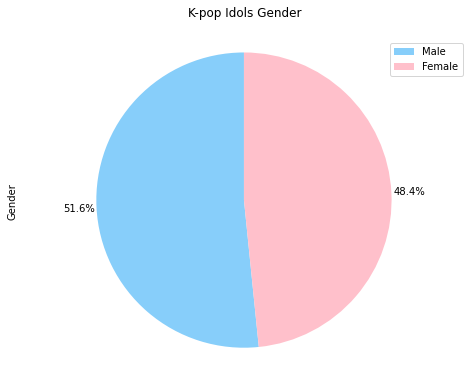

In [8]:
# I will visualize it in a pie chart
colors_list = ['lightskyblue', 'pink']
genders = idols['Gender'].value_counts()
genders.plot(kind='pie',
             figsize=(8, 6),
             autopct='%1.1f%%', 
             startangle=90,     
             labels=None,         
             pctdistance=1.12,# the ratio between the center of each pie slice and the start of the text generated by autopct 
             colors=colors_list,
             )

plt.title('K-pop Idols Gender\n')
plt.axis('equal')
plt.legend(labels=['Male', 'Female'], loc='upper right') 
plt.show()

There's slight difference between the percentage. So, it can be concluded that the number of female idols is not much different from the number of male idols.

### 2. Does K-pop idols only came from South Korea?
To answer this, we will look further on the <code>Country</code> column.

In [9]:
idols['Country'].nunique()

12

The K-pop idols came from 12 countries, not only from South Korea. Let's look deeper.

In [10]:
idols['Country'].value_counts()

South Korea    1204
China            39
Japan            27
USA              14
Taiwan            6
Thailand          6
Canada            5
Hong Kong         4
Indonesia         2
Australia         1
Philippines       1
Malaysia          1
Name: Country, dtype: int64

From this result, we could see that foreign members are not so much in comparison South Korean. I want to know who is came from Indonesia (because I'm Indonesian hehe).

In [11]:
indo = idols[idols['Country'] == 'Indonesia']
indo

,Stage Name,Full Name,Date of Birth,Group,Country,Other Group,Gender
168,Dita,Dita Karang,1996-12-25,SECRET NUMBER,Indonesia,NaN,F
714,Loudi,Won Jihoon,1996-04-13,14U,Indonesia,NaN,M


Here are Dita from SECRET NUMBER and Loudi from 14U.

Due to significant comparison (in number), I will choose **The Top 3 Country**.

In [12]:
top3 = idols['Country'].value_counts(ascending=False)
top3 = top3.head(3)
top3

South Korea    1204
China            39
Japan            27
Name: Country, dtype: int64

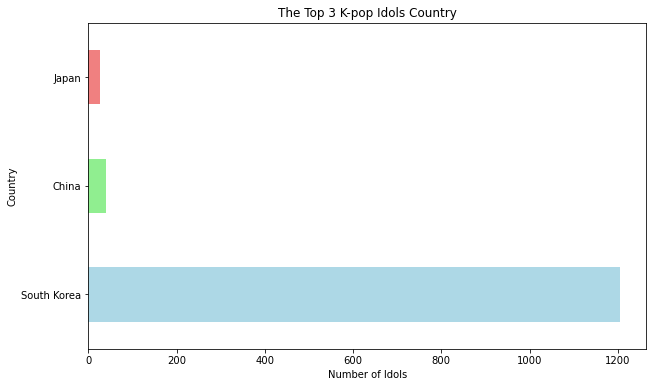

In [13]:
colors = ['lightblue', 'lightgreen', 'lightcoral']
top3.plot(kind='barh', figsize=(10, 6), color = colors)
plt.xlabel('Number of Idols')
plt.ylabel('Country')
plt.title("The Top 3 K-pop Idols Country")
plt.show()

Why K-pop idols is not only South Korean?

According to [The Pudding](https://pudding.cool/2020/10/kpop/), there's International Casting. Agencies began more proactive global recruiting in the mid 2000s, perhaps to capitalize on K-pop’s international growth. 
Global auditions were held primarily in the USA and Canada before expanding into China, Japan, Thailand, Australia, and more. Many agencies now enable hopefuls to audition online and, while there are not always limits on nationality, the majority of idols that debut are from East Asian countries or have East Asian heritage.

From the bar chart above, the top 3 K-pop idols country is South Korea, China and Japan.

### 3. a) How many groups in K-pop?

In [14]:
idols['Group'].nunique()

208

There are 208 K-pop groups in total from 1992 to 2020. But if we look back to missing values, <code>Group</code> column has 91 missing values.

In [15]:
solo = idols[idols['Group'].isnull()]
solo.head(5)

,Stage Name,Full Name,Date of Birth,Group,Country,Other Group,Gender
7,Ailee,Lee Yejin,1989-05-30,NaN,South Korea,NaN,F
10,AleXa,Kim Seri,1996-12-06,NaN,USA,NaN,F
16,Arang,Son Mnjung,2000-03-08,NaN,South Korea,NaN,F
30,B.I,Kim Hanbin,1996-10-22,NaN,South Korea,NaN,M
42,Bekah,Rebecca Kim,1989-08-11,NaN,South Korea,NaN,F


Ailee, for the example, is a solo singer, she doesn't have a group. So the missing value in <code>Group</code> column aren't missing. The idol is a **soloist** and doesn't belong to any group.

### 3. b) How many idols that have more than one group (other group)?

In [16]:
idols[idols['Other Group'].notnull()].tail(5)

,Stage Name,Full Name,Date of Birth,Group,Country,Other Group,Gender
1262,Youngmin,Lee Youngmin,1995-12-25,AB6IX,South Korea,MXM,M
1281,Yuna,Seo Yuna,1992-12-30,AoA,South Korea,AOA BLACK,F
1296,Yuta,Nakamoto Yuta,1995-10-26,NCT,Japan,NCT 127,M
1299,Yves,Ha Sooyoung,1997-05-24,LOONA,South Korea,Loona yyxy,F
1306,ZN,Bae Jinye,1994-06-09,LABOUM,South Korea,UNI.T,F


I will choose one example, Yuta. Yuta is NCT group member, but he also NCT 127 group member. The <code>Other Group</code> here means **sub-unit group**. NCT 127 is a sub-unit group of NCT.

[Sub-units](https://pudding.cool/2020/10/kpop/) : 
As groups became larger and international casting became more popular, subunits became more prevalent. These are smaller groups-within-a-group that may target a different market or audience by exploring different musical influences or promoting in non-Korean languages.

There are 122 idols which became a member of their sub-unit group.

### 4. How many idols use stage name?
First I will separate the surname and first name of the idols.

In [17]:
idols['Full Name'] = idols['Full Name'].astype(str)

In [18]:
idols['Surname'] = idols['Full Name'].apply(lambda x: x.split(' ')[0])

In [19]:
idols['First Name'] = idols['Full Name'].apply(lambda x: x.split(' ')[-1])

In [20]:
idols.head(3)

,Stage Name,Full Name,Date of Birth,Group,Country,Other Group,Gender,Surname,First Name
0,A.M,Seong Hyunwoo,1996-12-31,Limitless,South Korea,NaN,M,Seong,Hyunwoo
1,Ace,Jang Wooyoung,1992-08-28,VAV,South Korea,NaN,M,Jang,Wooyoung
2,Aeji,Kwon Aeji,1999-10-25,Hashtag,South Korea,NaN,F,Kwon,Aeji


The <code>Full Name</code> can be dropped now.

In [21]:
idols = idols.drop(['Full Name'], axis=1)
idols.head(1)

,Stage Name,Date of Birth,Group,Country,Other Group,Gender,Surname,First Name
0,A.M,1996-12-31,Limitless,South Korea,NaN,M,Seong,Hyunwoo


Next, I want to know idols that use their original name as stage name.

In [22]:
def label_race(row):
    if row['Stage Name'] == row['First Name'] :
        return 'Same'
    if row['Stage Name'] != row['First Name'] :
        return 'Different'

In [23]:
idols['Same'] = idols.apply(lambda row: label_race(row), axis=1)
idols['Same'].value_counts()

Same         728
Different    582
Name: Same, dtype: int64

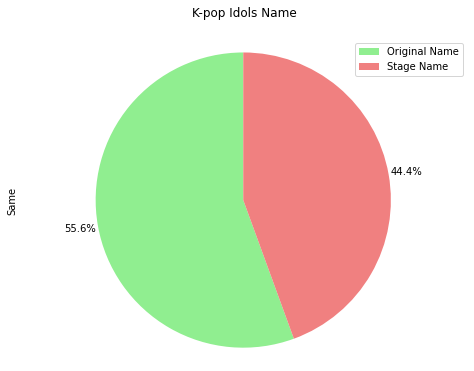

In [24]:
# I will visualize it in a pie chart
colors_list = ['lightgreen', 'lightcoral']
same = idols['Same'].value_counts()
same.plot(kind='pie',
             figsize=(8, 6),
             autopct='%1.1f%%', 
             startangle=90,     
             labels=None,         
             pctdistance=1.12, 
             colors=colors_list,
             )

plt.title('K-pop Idols Name\n')
plt.axis('equal')
plt.legend(labels=['Original Name', 'Stage Name'], loc='upper right') 
plt.show()

Impressive, 44.4% of K-pop idols use stage name! [Selma Finn](https://www.quora.com/Why-do-some-K-pop-idols-not-use-their-real-names) said they do it for a variety of reasons:<br>
- There's another debuted idol with that name
- They want to distance their stage/on camera personas from their real selves
- They're a foreign idol and don't want to stand out
- Their name is too long
- They don't like their name
- They want to appeal to an internation audience, so they pick an English stage name instead of their Korean one
- It's already the nickname their friends call them

### 5. How about K-pop idols age generation?
To answer this, I will change the type of <code>Date of Birth</code> column from string to datetime.

In [25]:
idols['Date of Birth']= pd.to_datetime(idols['Date of Birth'])

In [26]:
idols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Stage Name     1310 non-null   object        
 1   Date of Birth  1310 non-null   datetime64[ns]
 2   Group          1219 non-null   object        
 3   Country        1310 non-null   object        
 4   Other Group    122 non-null    object        
 5   Gender         1310 non-null   object        
 6   Surname        1310 non-null   object        
 7   First Name     1310 non-null   object        
 8   Same           1310 non-null   object        
dtypes: datetime64[ns](1), object(8)
memory usage: 92.2+ KB


Next, I will extract year into <code>Year</code> column.

In [27]:
idols['Year'] = pd.DatetimeIndex(idols['Date of Birth']).year

In [28]:
idols['Year'].unique()

array([1996, 1992, 1999, 2001, 1991, 1989, 2000, 1990, 1998, 1994, 1993,
       1997, 1995, 2002, 1987, 1984, 1986, 2003, 2004, 2005, 1988, 1985,
       1983, 1981, 1980, 1977, 1982], dtype=int64)

From this unique value, it can be seen that the range of year is 1977 - 2005. So, I will use these three age band of generation (according to [The Pew Research Center](https://www.mentalfloss.com/article/609811/age-ranges-millennials-and-generation-z)) :
- Generation X : Born 1965-1980 (39-54 years old)
- Generation Y (Millennials) : Born 1981-1996 (23-38 years old)
- Generation Z : Born 1997-2012 (7-22 years old)

In [29]:
def generation(row):    
    if row['Year'] <= 1980:
        return 'X'
    if (row['Year'] > 1980) & (row['Year'] < 1997):
        return 'Y'
    if (row['Year'] > 1996) & (row['Year'] < 2013):
        return 'Z'

In [30]:
idols['Generation'] = idols.apply(lambda row: generation(row), axis=1)
idols['Generation'].value_counts()

Y    731
Z    577
X      2
Name: Generation, dtype: int64

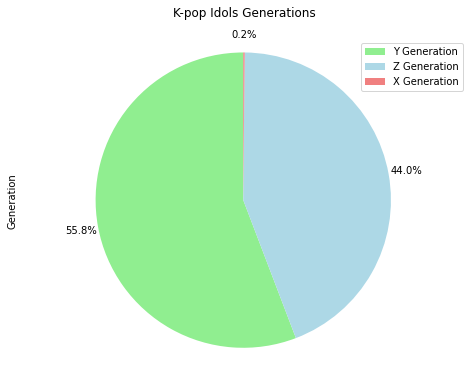

In [31]:
# I will visualize it in a pie chart
colors_list = ['lightgreen', 'lightblue', 'lightcoral']
generation = idols['Generation'].value_counts()
generation.plot(kind='pie',
             figsize=(8, 6),
             autopct='%1.1f%%', 
             startangle=90,     
             labels=None,         
             pctdistance=1.12, 
             colors=colors_list,
             )

plt.title('K-pop Idols Generations\n')
plt.axis('equal')
plt.legend(labels=['Y Generation', 'Z Generation', 'X Generation'], loc='upper right') 
plt.show()

From this pie chart, it can be seen that Millenials (generation Y) is dominating. Until 2020, the K-pop idols mostly born in 1981 - 1996.

### Conclusion

After these exploration, we can see some insight behind the K-pop idols data from 1992 to 2020 :
- The number of male idols and female idols is slightly different.
- The idols not only came from South Korea, they came from 12 countries. The top 3 countries : South Korea, China, and Japan. The goal of recruiting foreign idols is to capitalize on K-pop’s international growth. 
- There are 208 K-pop group in total. Some of idols are soloist that doesn't belong to any group.
- The K-pop group also have sub-unit group that may target a different market or audience by exploring different musical influences or promoting in non-Korean languages.
- About 44.4% of K-pop idols are use stage name than their original name for several reason.
- Until 2020, Millenials generation is dominating in K-pop industry.

In [32]:
idols.head(10)

,Stage Name,Date of Birth,Group,Country,Other Group,Gender,Surname,First Name,Same,Year,Generation
0,A.M,1996-12-31,Limitless,South Korea,NaN,M,Seong,Hyunwoo,Different,1996,Y
1,Ace,1992-08-28,VAV,South Korea,NaN,M,Jang,Wooyoung,Different,1992,Y
2,Aeji,1999-10-25,Hashtag,South Korea,NaN,F,Kwon,Aeji,Same,1999,Z
3,AhIn,1999-09-27,MOMOLAND,South Korea,NaN,F,Lee,Ahin,Different,1999,Z
4,Ahra,2001-02-21,Favorite,South Korea,NaN,F,Go,Ahra,Same,2001,Z
5,Ahyoung,1991-05-26,Dal Shabet,South Korea,NaN,F,Cho,Jayoung,Different,1991,Y
6,Ahyung,1996-08-27,P.O.P,South Korea,NaN,F,Kang,Ahyoung,Different,1996,Y
7,Ailee,1989-05-30,NaN,South Korea,NaN,F,Lee,Yejin,Different,1989,Y
8,Aini,1991-07-13,Pink Fantasy,South Korea,NaN,F,Kim,Heejung,Different,1991,Y
9,Aisha,2000-07-21,Everglow,South Korea,NaN,F,Heo,Yoorim,Different,2000,Z
